In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
df = pd.read_csv("PVA_features.csv")

In [9]:
df

,call_timestamp,callref,current_age,sex,years_since_first_symptom,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,...,RSDVA,APQ,SAPQ,NHR,VTI,Intensity,SPI,on_treatment_id,Target,Class
0,2014/01/11 02:20:08 UTC +0000,1749611,39,F,32,150.82127,787.773575,3.043524,0.466040,3.389985,...,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.054875,0.804977,False,1,6
1,2014/01/22 04:30:16 UTC +0000,3812301,64,M,8,146.92941,1510.197058,2.542658,0.325218,16.381329,...,4964.843928,101.651603,166.673051,0.004597,0.092386,0.135420,0.744562,True,1,4
2,2014/01/09 19:52:32 UTC +0000,6572221,66,F,13,153.09265,1753.066594,2.410086,0.192787,2.906834,...,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.109340,0.405923,True,1,5
3,2014/01/08 18:40:05 UTC +0000,2388093,49,F,7,153.65819,1690.313366,2.446445,0.304100,2.635581,...,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.113397,0.333582,True,1,3
4,2014/01/20 16:23:35 UTC +0000,2618085,51,F,11,151.61546,1361.879254,2.447181,0.312519,2.468181,...,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.058522,0.481075,True,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2014/03/10 03:49:46 UTC +0000,2034539,65,F,9,178.97552,1007.537544,3.530855,0.355486,2.408186,...,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.114906,0.595077,True,1,4
775,2014/03/10 05:06:02 UTC +0000,4078150,55,F,0,149.90842,1819.308710,2.707083,0.318716,7.421225,...,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.140167,0.424437,False,0,0
776,2014/03/10 12:37:55 UTC +0000,9778657,50,F,2,149.53152,1152.307668,3.629170,0.313017,1.345998,...,538316.195000,79.541005,166.669880,0.008908,0.175997,0.229239,0.386682,True,1,1
777,2014/03/10 20:37:22 UTC +0000,4452027,62,M,0,148.53487,823.692981,2.903446,0.446732,2.306650,...,11171.028120,71.782639,166.680681,0.004207,0.069710,0.087151,0.603865,True,0,0


In [10]:
df["sex"] = df["sex"].replace("F",0)
df["sex"] = df["sex"].replace("M",1)

<AxesSubplot:>

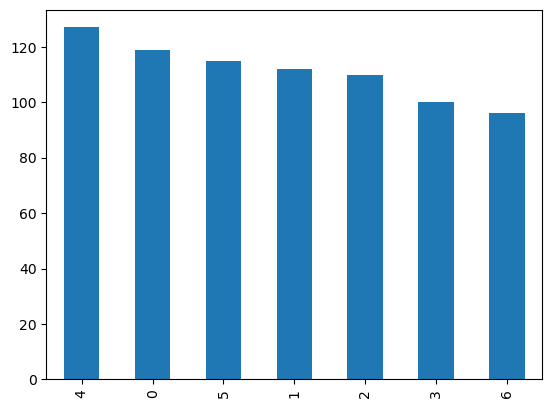

In [12]:
df["Class"].value_counts().plot(kind="bar")

In [5]:
df

,call_timestamp,callref,current_age,sex,years_since_first_symptom,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,...,RSDVA,APQ,SAPQ,NHR,VTI,Intensity,SPI,on_treatment_id,Target,Class
0,2014/01/11 02:20:08 UTC +0000,1749611,39,0.0,32,150.82127,787.773575,3.043524,0.466040,3.389985,...,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.054875,0.804977,False,1,6
1,2014/01/22 04:30:16 UTC +0000,3812301,64,1.0,8,146.92941,1510.197058,2.542658,0.325218,16.381329,...,4964.843928,101.651603,166.673051,0.004597,0.092386,0.135420,0.744562,True,1,4
2,2014/01/09 19:52:32 UTC +0000,6572221,66,0.0,13,153.09265,1753.066594,2.410086,0.192787,2.906834,...,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.109340,0.405923,True,1,5
3,2014/01/08 18:40:05 UTC +0000,2388093,49,0.0,7,153.65819,1690.313366,2.446445,0.304100,2.635581,...,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.113397,0.333582,True,1,3
4,2014/01/20 16:23:35 UTC +0000,2618085,51,0.0,11,151.61546,1361.879254,2.447181,0.312519,2.468181,...,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.058522,0.481075,True,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2014/03/10 03:49:46 UTC +0000,2034539,65,0.0,9,178.97552,1007.537544,3.530855,0.355486,2.408186,...,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.114906,0.595077,True,1,4
775,2014/03/10 05:06:02 UTC +0000,4078150,55,0.0,0,149.90842,1819.308710,2.707083,0.318716,7.421225,...,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.140167,0.424437,False,0,0
776,2014/03/10 12:37:55 UTC +0000,9778657,50,0.0,2,149.53152,1152.307668,3.629170,0.313017,1.345998,...,538316.195000,79.541005,166.669880,0.008908,0.175997,0.229239,0.386682,True,1,1
777,2014/03/10 20:37:22 UTC +0000,4452027,62,1.0,0,148.53487,823.692981,2.903446,0.446732,2.306650,...,11171.028120,71.782639,166.680681,0.004207,0.069710,0.087151,0.603865,True,0,0


In [6]:
df["Target"].sum()

660

In [9]:
Y = df["Class"]
X = df.drop(["call_timestamp","callref","years_since_first_symptom","current_age","sex","Target","Class","on_treatment_id","Intensity"],axis=1)

In [10]:
X

,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,SPPQ,Shimmer,RSDVA,APQ,SAPQ,NHR,VTI,SPI
0,150.82127,787.773575,3.043524,0.466040,3.389985,44.455531,-0.936114,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.804977
1,146.92941,1510.197058,2.542658,0.325218,16.381329,44.205482,-1.017444,4964.843928,101.651603,166.673051,0.004597,0.092386,0.744562
2,153.09265,1753.066594,2.410086,0.192787,2.906834,23.104722,-1.082912,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.405923
3,153.65819,1690.313366,2.446445,0.304100,2.635581,14.354979,-1.029603,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.333582
4,151.61546,1361.879254,2.447181,0.312519,2.468181,12.187294,-0.831550,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.481075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,178.97552,1007.537544,3.530855,0.355486,2.408186,25.608127,-1.195810,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.595077
775,149.90842,1819.308710,2.707083,0.318716,7.421225,17.618326,-0.846734,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.424437
776,149.53152,1152.307668,3.629170,0.313017,1.345998,31.300191,-1.429273,538316.195000,79.541005,166.669880,0.008908,0.175997,0.386682
777,148.53487,823.692981,2.903446,0.446732,2.306650,15.063619,-1.237079,11171.028120,71.782639,166.680681,0.004207,0.069710,0.603865


In [11]:
scale = StandardScaler()
X = scale.fit_transform(X)

Explained variance ratio: [0.20403293 0.12233868 0.11464795 0.09261556 0.08128464 0.073623
 0.06698304 0.06073945 0.05078568 0.04690926 0.03876426 0.03058671
 0.01668885]
1.0


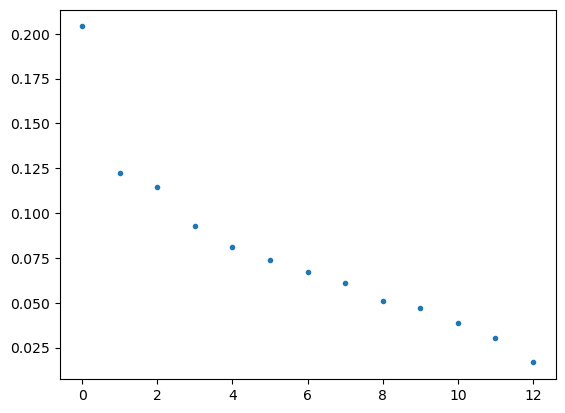

In [14]:
# Create a PCA object with two components
pca = PCA(n_components=13)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

# Print the explained variance ratio of the two components
print("Explained variance ratio:", pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_,'.')

In [15]:
# Upsample the minority class using SMOTE
smote = SMOTE(random_state=42)
X, Y= smote.fit_resample(X, Y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [17]:
gnb = GaussianNB()

In [18]:
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(X_test)

In [20]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report for Gaussian Naive Bayes Model")
print()
print(report)

Classification Report for Gaussian Naive Bayes Model

              precision    recall  f1-score   support

           0       0.11      0.04      0.06        25
           1       0.25      0.08      0.12        25
           2       0.17      0.06      0.09        35
           3       0.14      0.64      0.22        25
           4       0.22      0.10      0.14        20
           5       0.06      0.03      0.04        30
           6       0.20      0.06      0.09        18

    accuracy                           0.14       178
   macro avg       0.16      0.14      0.11       178
weighted avg       0.16      0.14      0.10       178



In [21]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("ACCURACY OF THE MODEL: ", accuracy*100)

ACCURACY OF THE MODEL:  14.04494382022472


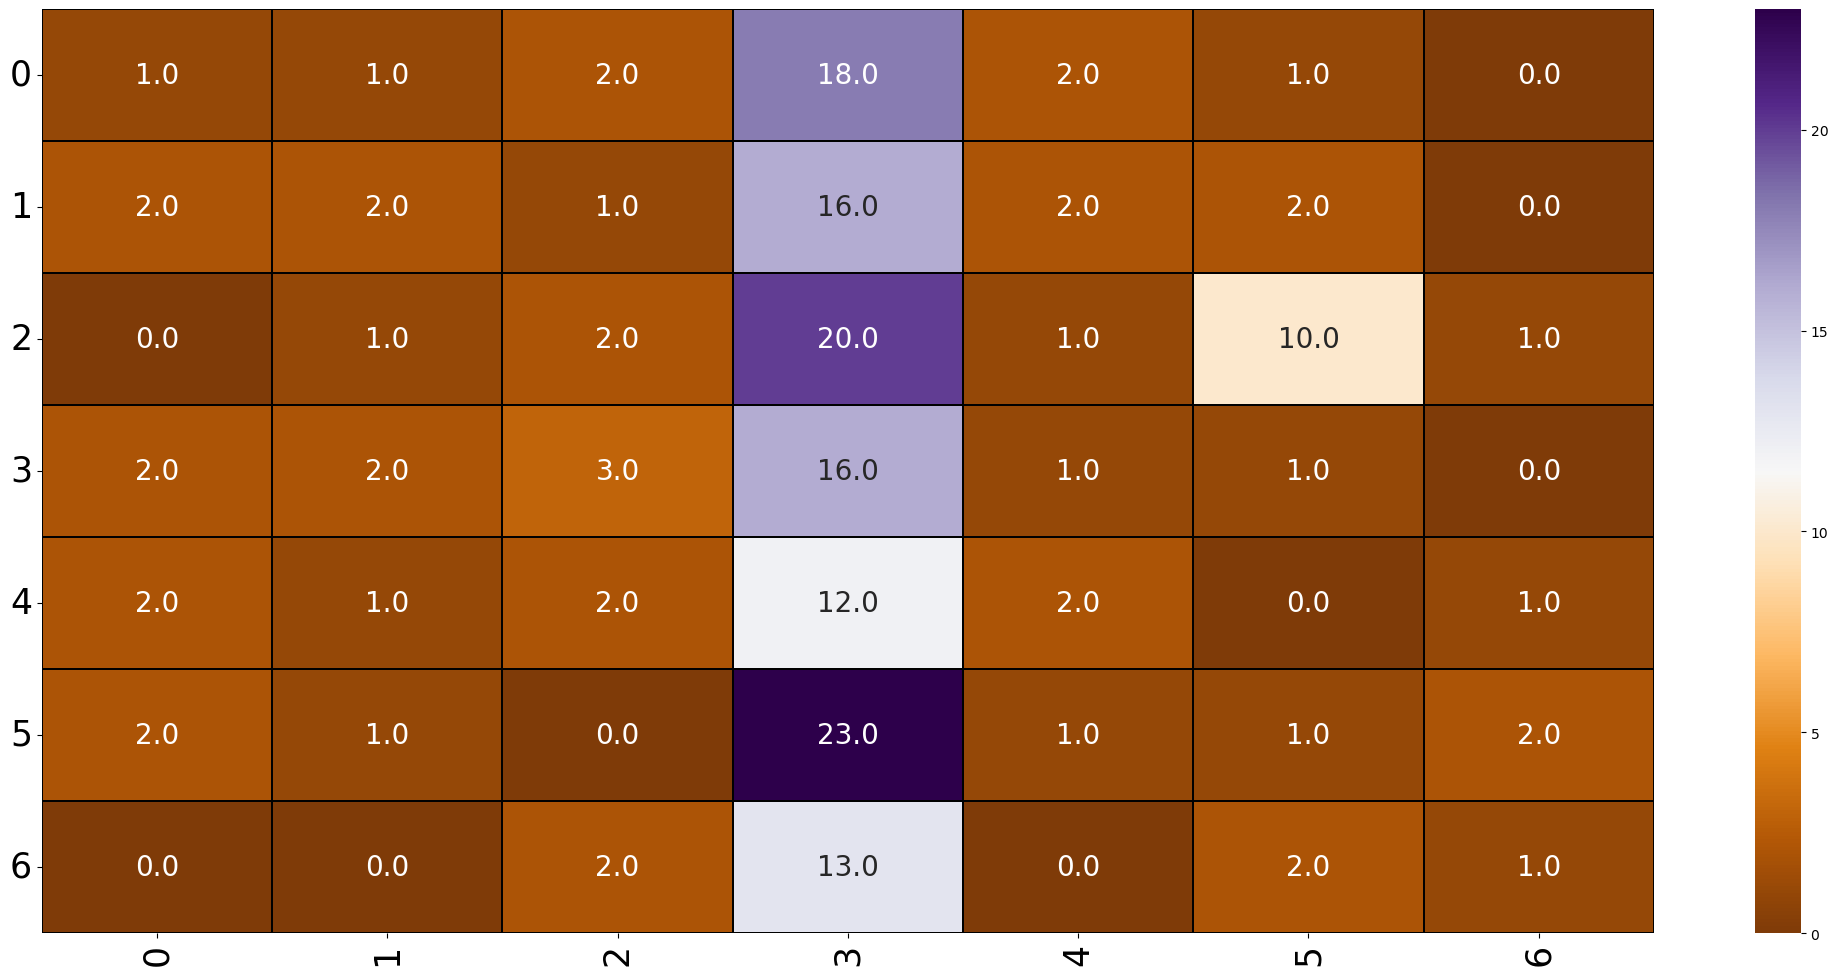

In [22]:
fig = plt.subplots(figsize=(26, 12));
sns.heatmap(cm, cmap = "PuOr",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()

In [23]:
accuracy_scores = [];
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i , p = 2 , metric = 'euclidean')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 1 , p = 2 , metric = 'euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [30]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report for KNN Model")
print()
print(report)

Classification Report for KNN Model

              precision    recall  f1-score   support

           0       0.37      0.28      0.32        25
           1       0.42      0.44      0.43        25
           2       0.43      0.26      0.32        35
           3       0.42      0.56      0.48        25
           4       0.27      0.35      0.30        20
           5       0.44      0.37      0.40        30
           6       0.39      0.61      0.48        18

    accuracy                           0.39       178
   macro avg       0.39      0.41      0.39       178
weighted avg       0.40      0.39      0.39       178



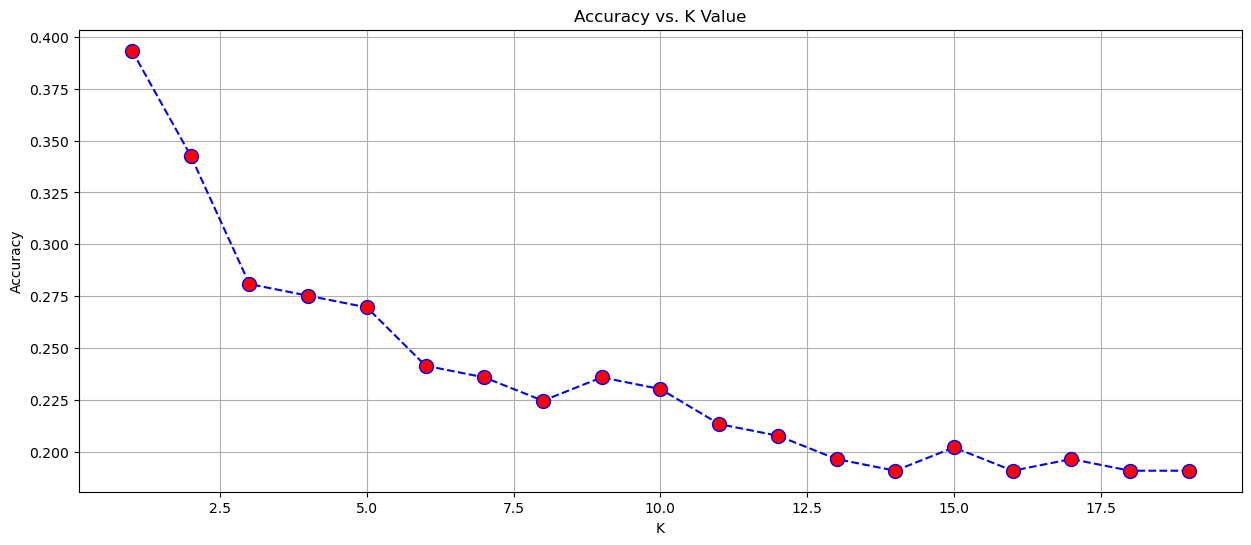

In [26]:
plt.figure(figsize=(15,6))
plt.plot(range(1,20),accuracy_scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [28]:
values_of_K = [];
max_value = np.max(accuracy_scores);

for j in range(len(accuracy_scores)):
    if accuracy_scores[j] == max_value:
        values_of_K.append(j);
print("Optimum value of K =",values_of_K[0]+1);
print("Accuracy for the data",max_value*100);

Optimum value of K = 1
Accuracy for the data 39.325842696629216


In [31]:
clf = RandomForestClassifier(n_estimators = 100)

In [32]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report for Random Forest Model")
print()
print(report)

Classification Report for Random Forest Model

              precision    recall  f1-score   support

           0       0.33      0.32      0.33        25
           1       0.25      0.32      0.28        25
           2       0.39      0.20      0.26        35
           3       0.38      0.52      0.44        25
           4       0.06      0.05      0.05        20
           5       0.23      0.20      0.21        30
           6       0.46      0.67      0.55        18

    accuracy                           0.31       178
   macro avg       0.30      0.33      0.30       178
weighted avg       0.30      0.31      0.30       178



In [35]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("ACCURACY OF THE MODEL: ", accuracy*100)

ACCURACY OF THE MODEL:  30.89887640449438


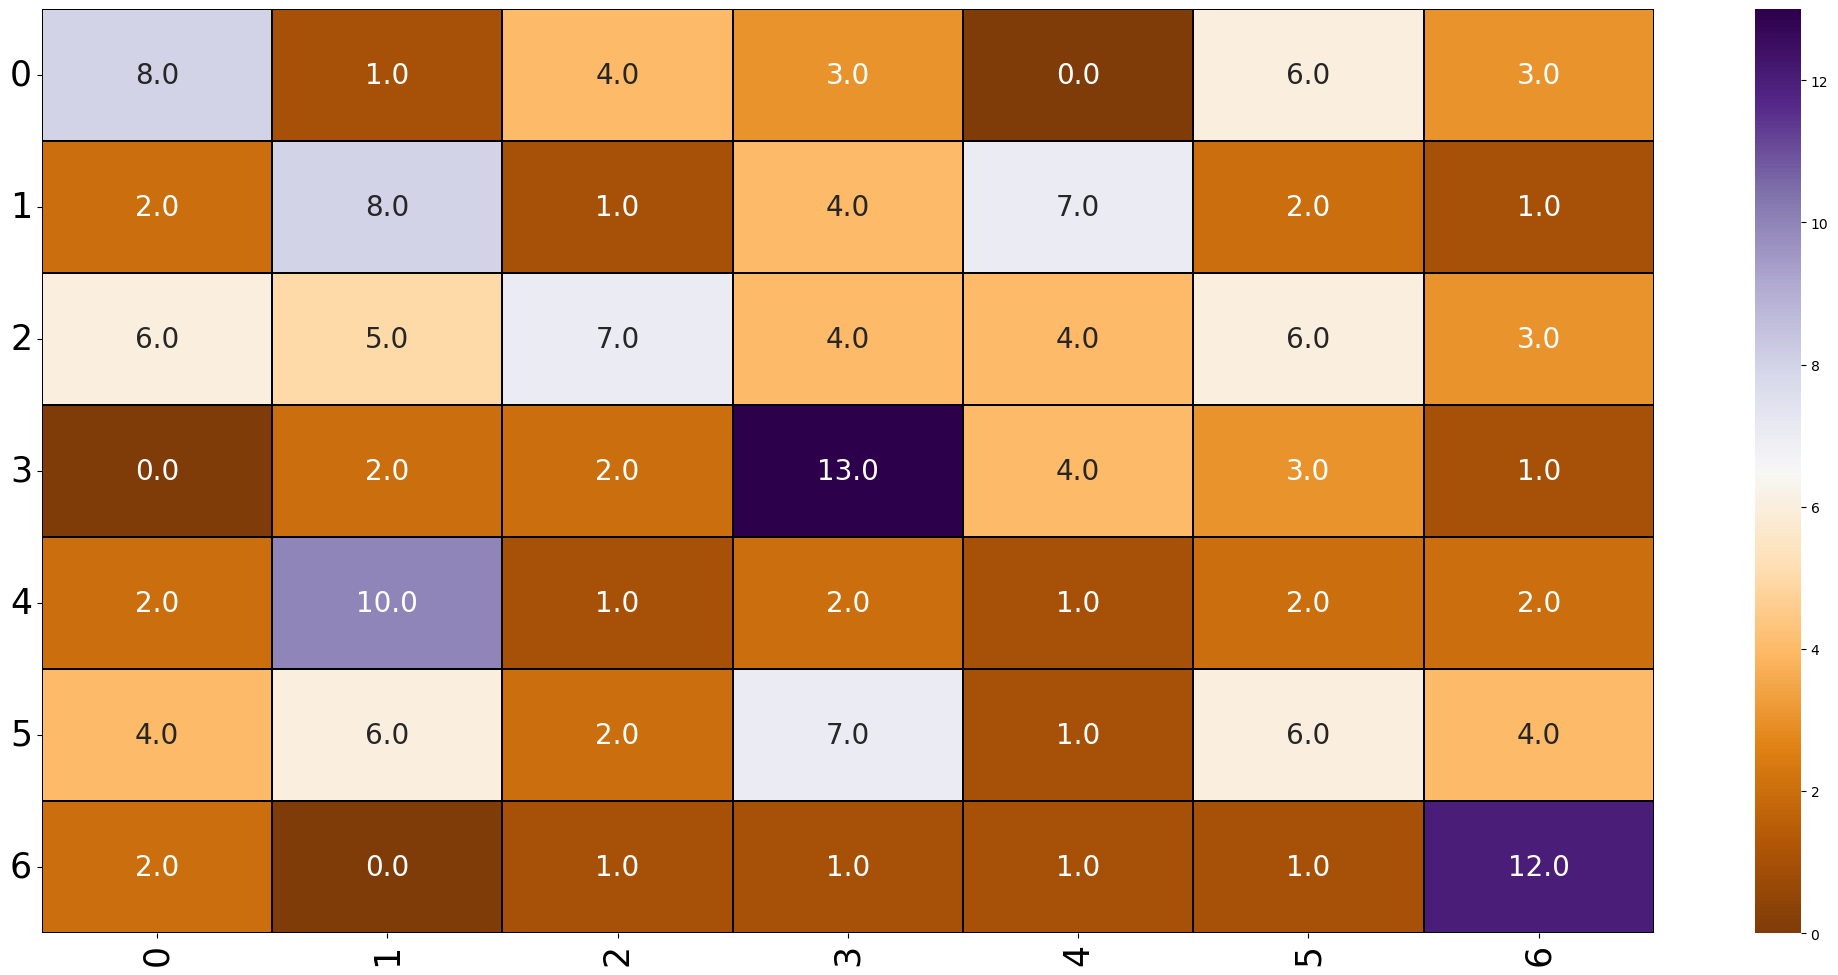

In [36]:
fig = plt.subplots(figsize=(26, 12));
sns.heatmap(cm, cmap = "PuOr",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()

In [37]:
# Fitting Model
lin = svm.SVC(kernel='linear', C=5.0)

In [38]:
lin.fit(X_train, y_train)

SVC(C=5.0, kernel='linear')

In [39]:
# Predictions
lin_pred = lin.predict(X_test)

In [40]:
# Generate a classification report
report = classification_report(y_test, lin_pred)
print("Classification Report for SVM Model (linear)")
print()
print(report)

Classification Report for SVM Model (linear)

              precision    recall  f1-score   support

           0       0.12      0.12      0.12        25
           1       0.21      0.36      0.27        25
           2       0.35      0.23      0.28        35
           3       0.12      0.12      0.12        25
           4       0.06      0.05      0.05        20
           5       0.09      0.03      0.05        30
           6       0.18      0.33      0.23        18

    accuracy                           0.17       178
   macro avg       0.16      0.18      0.16       178
weighted avg       0.17      0.17      0.16       178



In [41]:
# Checking Accuracy
lin_accuracy = accuracy_score(y_test, lin_pred)
lin_cm = confusion_matrix(y_test, lin_pred)
print('Accuracy (linear Kernel): ', "%.2f" % (lin_accuracy*100))

Accuracy (linear Kernel):  17.42


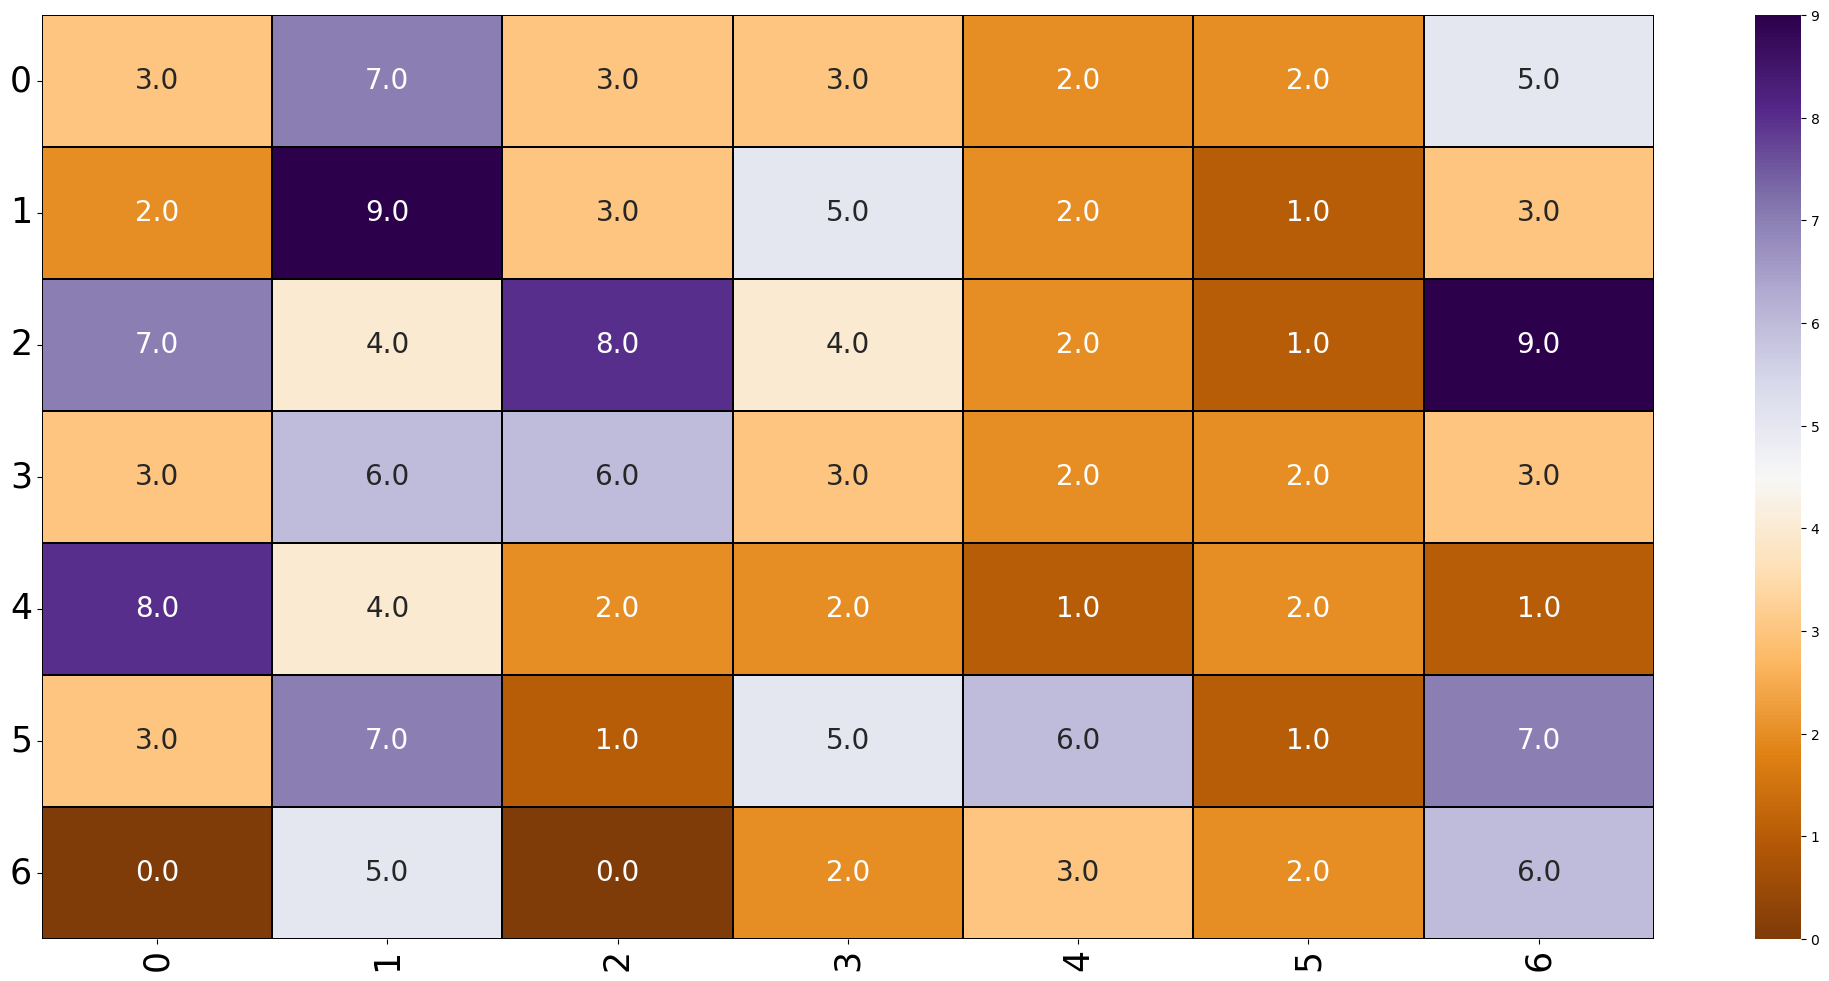

In [42]:
fig = plt.subplots(figsize=(26, 12));
sns.heatmap(lin_cm, cmap = "PuOr",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()

In [43]:
rbf = svm.SVC(kernel='rbf', random_state=1, gamma=0.5, C=2.0)

In [44]:
rbf.fit(X_train, y_train)

SVC(C=2.0, gamma=0.5, random_state=1)

In [45]:
# Predictions
rbf_pred = rbf.predict(X_test)

In [46]:
# Generate a classification report
report = classification_report(y_test, rbf_pred)
print("Classification Report for SVM Model (RBF)")
print()
print(report)

Classification Report for SVM Model (RBF)

              precision    recall  f1-score   support

           0       0.36      0.32      0.34        25
           1       0.31      0.32      0.31        25
           2       0.47      0.23      0.31        35
           3       0.46      0.52      0.49        25
           4       0.24      0.50      0.33        20
           5       0.45      0.33      0.38        30
           6       0.59      0.72      0.65        18

    accuracy                           0.39       178
   macro avg       0.41      0.42      0.40       178
weighted avg       0.42      0.39      0.39       178



In [47]:
# Checking Accuracy
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_cm = confusion_matrix(y_test, rbf_pred)
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))

Accuracy (RBF Kernel):  39.33


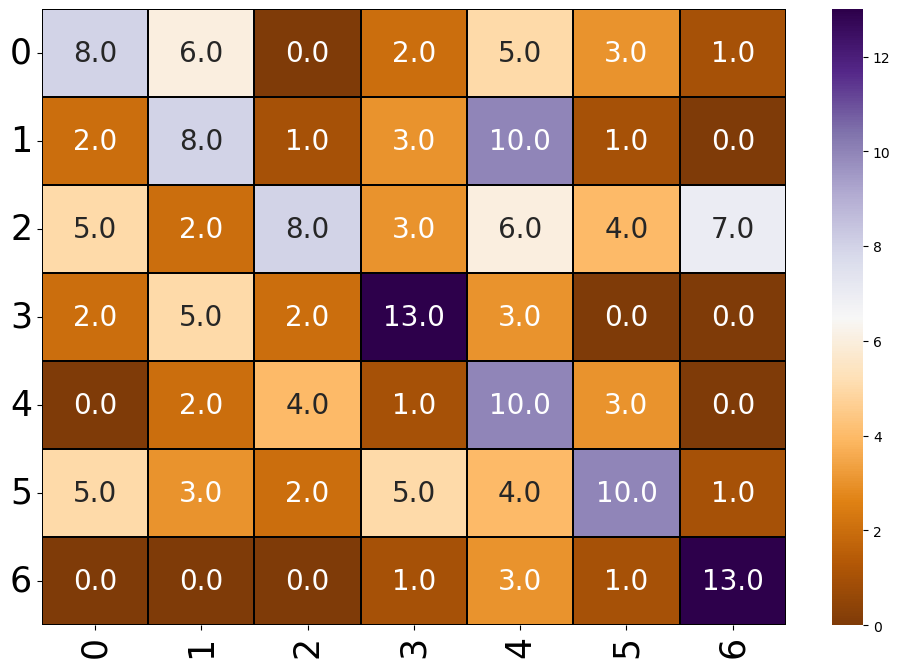

In [48]:
fig = plt.subplots(figsize=(12, 8));
sns.heatmap(rbf_cm, cmap = "PuOr",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()

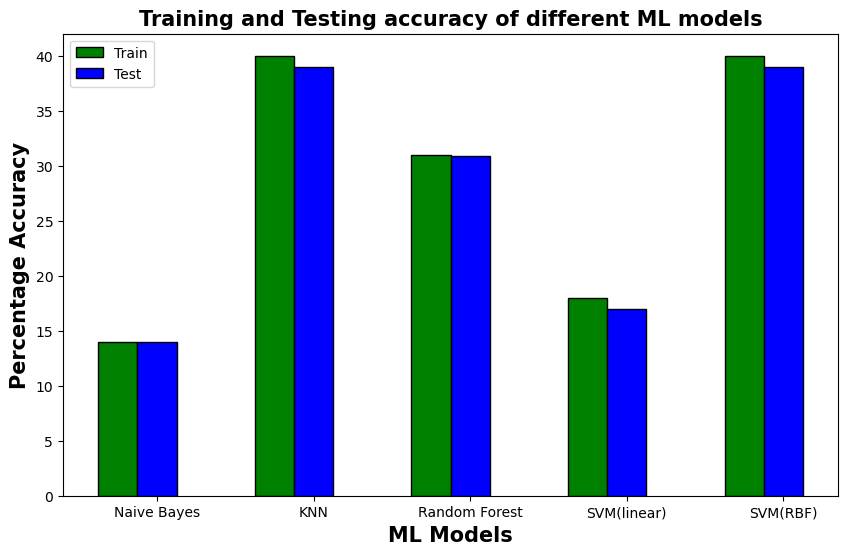

In [49]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
IT = [14,40,31,18,40]
ECE = [14,39,30.89,17,39]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, IT, color ='g', width = barWidth,
        edgecolor ='black', label ='Train')
plt.bar(br2, ECE, color ='b', width = barWidth,
        edgecolor ='black', label ='Test')
 
# Adding Xticks
plt.xlabel('ML Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ["Naive Bayes", "KNN", "Random Forest", "SVM(linear)", "SVM(RBF)"])
plt.title("Training and Testing accuracy of different ML models", fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.show()

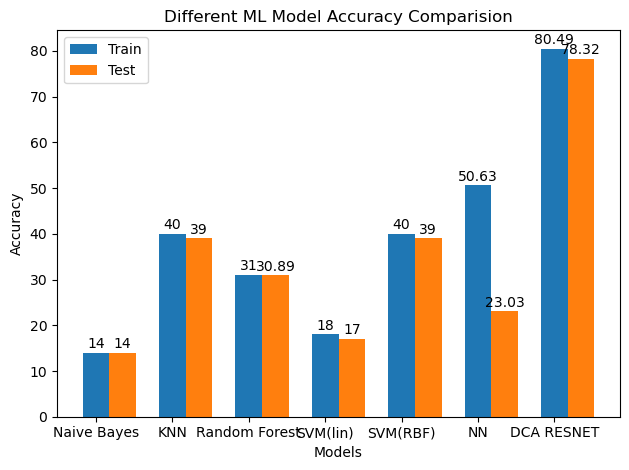

In [17]:
import matplotlib.pyplot as plt

# sample data
x = ['Naive Bayes', 'KNN', 'Random Forest', 'SVM(lin)','SVM(RBF)','NN','DCA RESNET']
y1 = [14,40,31,18,40,50.63, 80.49]
y2 = [14,39,30.89,17,39,23.03, 78.32]

# create figure and axes
fig, ax = plt.subplots()

# set the width of each bar
bar_width = 0.35

# create first set of bars
ax.bar(x, y1, width=bar_width, label='Train')

# create second set of bars with adjusted x-coordinates
ax.bar([i + bar_width for i in range(len(x))], y2, width=bar_width, label='Test')

# add numbers on top of bars
for i in range(len(x)):
    plt.text(x=i, y=y1[i]+1, s=y1[i], ha='center')
    plt.text(x=i+bar_width, y=y2[i]+1, s=y2[i], ha='center')

# set labels and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Different ML Model Accuracy Comparision')
ax.legend()

plt.tight_layout()
# show plot
plt.show()